# Import necessary modules

In [789]:
import pandas as pd
import numpy as  np
import random as rnd
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,LassoCV,LassoLarsCV
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Read Data and view details using method info()

In [790]:
trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')
combine = [trainset,testset]
y_train = trainset['SalePrice']
test_Id = testset['Id']

trainset.info()
print('-'*90)
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [791]:
print(trainset['PoolArea'].unique())

[  0 512 648 576 555 480 519 738]


# Remove the features with very high NaN values

In [792]:
for each in combine:
    each.drop(['Id'],axis=1,inplace=True)

# Remove Outliers

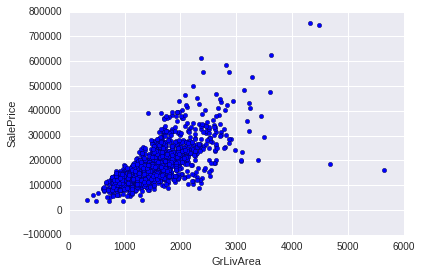

In [793]:
plt.scatter(trainset.GrLivArea,y_train)
plt.xlabel("GrLivArea")
plt.ylabel('SalePrice')
plt.show()

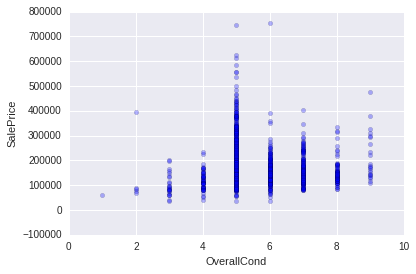

In [794]:
plt.scatter(trainset.OverallCond,y_train,alpha = 0.3)
plt.xlabel("OverallCond")
plt.ylabel('SalePrice')
plt.show()

In [795]:
#trainset.drop(trainset[trainset['GrLivArea']>4500].index,inplace =True)

# Preparing Train dataset

Seperate the categorical and numerical variable and
Create different dataframes for each

In [796]:
cat = trainset.select_dtypes(include=['object']).columns
num = trainset.select_dtypes(exclude=['object']).columns

train_cat = trainset[cat]
train_num = trainset[num]
trainset.drop(cat,1,inplace=True)
trainset.drop(num,1,inplace=True)

print(train_num.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


Filling some NA values with mean 

In [797]:
train_cat.loc[:, "Alley"] = train_cat.loc[:, "Alley"].fillna("No")
train_cat.loc[:, "Fence"] = train_cat.loc[:, "Fence"].fillna("No")
train_cat.loc[:, "PoolQC"] = train_cat.loc[:, "PoolQC"].fillna("No")
train_cat.loc[:, "MiscFeature"] = train_cat.loc[:, "MiscFeature"].fillna("No")
train_cat.loc[:, "FireplaceQu"] = train_cat.loc[:, "FireplaceQu"].fillna("No")
train_cat.loc[:, "GarageType"] = train_cat.loc[:, "GarageType"].fillna("No")
train_cat.loc[:, "GarageFinish"] = train_cat.loc[:, "GarageFinish"].fillna("No")
train_cat.loc[:, "GarageQual"] = train_cat.loc[:, "GarageQual"].fillna("No")
train_cat.loc[:, "GarageCond"] = train_cat.loc[:, "GarageCond"].fillna("No")
train_cat.loc[:, "BsmtQual"] = train_cat.loc[:, "BsmtQual"].fillna("No")
train_cat.loc[:, "BsmtCond"] = train_cat.loc[:, "BsmtCond"].fillna("No")
train_cat.loc[:, "BsmtExposure"] = train_cat.loc[:, "BsmtExposure"].fillna("No")
train_cat.loc[:, "BsmtFinType1"] = train_cat.loc[:, "BsmtFinType1"].fillna("No")
train_cat.loc[:, "MasVnrType"] = train_cat.loc[:, "MasVnrType"].fillna("None")
train_cat.loc[:, "BsmtFinType2"] = train_cat.loc[:, "BsmtFinType2"].fillna("No")
train_cat.loc[:, "Electrical"] = train_cat.loc[:,"Electrical"].fillna("SBrkr")
train_cat.loc[:, "MSZoning"] = train_cat.loc[:,"MSZoning"].fillna(train_cat.loc[:,'MSZoning'].mode())
train_cat.loc[:, "Functional"] = train_cat.loc[:,"Functional"].fillna(train_cat.loc[:,'Functional'].mode())
train_cat.loc[:, "Utilities"] = train_cat.loc[:,"Utilities"].fillna(train_cat.loc[:,'Utilities'].mode())
train_cat.loc[:, "SaleType"] = train_cat.loc[:,"SaleType"].fillna(train_cat.loc[:,'SaleType'].mode())
train_cat.loc[:, "Exterior2nd"] = train_cat.loc[:,"Exterior2nd"].fillna(train_cat.loc[:,'Exterior2nd'].mode())
train_cat.loc[:, "Exterior1st"] = train_cat.loc[:,"Exterior1st"].fillna(train_cat.loc[:,'Exterior1st'].mode())
train_cat.loc[:, "KitchenQual"] = train_cat.loc[:,"KitchenQual"].fillna(train_cat.loc[:,'KitchenQual'].mode())

train_num = train_num.fillna(train_num.mean())

print(train_cat.isnull().sum().sort_values(ascending=False))
print(train_num.isnull().sum().sort_values(ascending=False))

#train_num = np.log(train_num)

/home/mohan/.local/lib/python3.5/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
Foundation       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
ExterCond        0
BsmtQual         0
SaleType         0
FireplaceQu      0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
BsmtCond         0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64
SalePrice        0
BsmtHalfBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0

Convert some categorical features to numerical features

In [798]:
#trainset['MSSubClass'] = trainset['MSSubClass'].astype(str)

In [799]:
   train_num = train_num.replace({"MSSubClass" : {   
    20:'1s46n',
    30:'1s45o',
    40:'1s_wfa_allages',
    45:'112sunf',
    50:'112sf',
    60:'246n',
    70:'245o',
    75:'212s',
    80:'spl_ml',
    85:'spl_fo',
    90:'duplex',
    120:'1spud',
    150:'112spud',
    160:'2spud',
    180:'pudm',
    190:'2fc'}
   })


In [800]:
train_cat = train_cat.replace({

    "Alley" : {"No" : 0, "Grvl" : 1, "Pave" : 2},
                    "Fence" : {"No" : 0,"GdPrv" : 1, "MnPrv" : 2,"GdWo" : 3,"MnWw" :5},
                    "PoolQC" : {"No" : 0,"Fa" : 1, "TA" : 2,"Gd" : 3,"Ex" :5},
                    "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                    "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                    "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                    "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                    "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},                   
                       "LandContour" : {"Lvl" : 1, "Bnk" : 2, "Hls" : 3, "Low" : 4},
                       "LotConfig" : {"Inside" : 1, "Corner" : 2, "CulDSac" : 3, "FR2" : 4, "FR3" :5},
                      "BldgType" : {"1Fam" : 1, "2FmCon" : 2, "Duplx" : 3, "TwnhsE" : 4, "TwnhsI" : 5},
                      
                "RoofStyle" : {"Flat" : 1, "Gable" : 2, "Gambrel" : 3, "Hip" : 4, "Mansard" :5 , "Shed" : 6}}
                     )

Now concatenate both categorical and numerical features into trainset

In [801]:
trainset = pd.concat([train_num,train_cat],axis =1)

Then seperate both cat and num features again


In [802]:
cat = trainset.select_dtypes(include=['object']).columns
num = trainset.select_dtypes(exclude=['object']).columns

New numerical features also include the recently converted categorical features above

In [803]:
train_cat = trainset[cat]
train_num = trainset[num]


Check whether there were any NaN values in features

In [804]:
print(train_cat.isnull().sum().any().any())
print(train_num.isnull().sum().any().any())

False
False


In [805]:
trainset.drop(cat,1,inplace=True)
trainset.drop(num,1,inplace=True)

In [806]:
print(train_num.shape)
print(train_cat.shape)

(1460, 59)
(1460, 21)


We have 1460 sample data with 38 numerical features and 38 categorical features

# Preparing test dataset

Seperate the categorical and numerical variable and
Create different dataframes for each

In [807]:
cat = testset.select_dtypes(include=['object']).columns
num = testset.select_dtypes(exclude=['object']).columns

test_cat = testset[cat]
test_num = testset[num]

testset.drop(cat,1,inplace=True)
testset.drop(num,1,inplace=True)

Filling some NA values with mean 

In [808]:
test_cat.loc[:, "Alley"] = test_cat.loc[:, "Alley"].fillna("No")
test_cat.loc[:, "Fence"] = test_cat.loc[:, "Fence"].fillna("No")
test_cat.loc[:, "PoolQC"] = test_cat.loc[:, "PoolQC"].fillna("No")
test_cat.loc[:, "FireplaceQu"] = test_cat.loc[:, "FireplaceQu"].fillna("No")
test_cat.loc[:, "GarageType"] = test_cat.loc[:, "GarageType"].fillna("No")
test_cat.loc[:, "GarageFinish"] = test_cat.loc[:, "GarageFinish"].fillna("No")
test_cat.loc[:, "GarageQual"] = test_cat.loc[:, "GarageQual"].fillna("No")
test_cat.loc[:, "GarageCond"] = test_cat.loc[:, "GarageCond"].fillna("No")
test_cat.loc[:, "BsmtQual"] = test_cat.loc[:, "BsmtQual"].fillna("No")
test_cat.loc[:, "BsmtCond"] = test_cat.loc[:, "BsmtCond"].fillna("No")
test_cat.loc[:, "BsmtExposure"] = test_cat.loc[:, "BsmtExposure"].fillna("No")
test_cat.loc[:, "BsmtFinType1"] = test_cat.loc[:, "BsmtFinType1"].fillna("No")
test_cat.loc[:, "MasVnrType"] = test_cat.loc[:, "MasVnrType"].fillna("None")
test_cat.loc[:, "BsmtFinType2"] = test_cat.loc[:, "BsmtFinType2"].fillna("No")
test_cat.loc[:, "Electrical"] = test_cat.loc[:, "Electrical"].fillna("SBrkr")
test_cat.loc[:, "MSZoning"] = test_cat.loc[:, "MSZoning"].fillna(test_cat['MSZoning'].dropna().mode()[0])
test_cat.loc[:, "Functional"] = test_cat.loc[:, "Functional"].fillna(test_cat.loc[:,'Functional'].mode()[0])
test_cat.loc[:, "Utilities"] = test_cat.loc[:, "Utilities"].fillna(test_cat.loc[:,'Utilities'].mode()[0])
test_cat.loc[:, "SaleType"] = test_cat.loc[:,"SaleType"].fillna(test_cat.loc[:,'SaleType'].mode()[0])
test_cat.loc[:, "Exterior2nd"] = test_cat.loc[:, "Exterior2nd"].fillna(test_cat.loc[:,'Exterior2nd'].mode()[0])
test_cat.loc[:, "Exterior1st"] = test_cat.loc[:, "Exterior1st"].fillna(test_cat.loc[:,'Exterior1st'].mode()[0])
test_cat.loc[:, "KitchenQual"] = test_cat.loc[:, "KitchenQual"].fillna(test_cat.loc[:,'KitchenQual'].mode()[0])


test_num = test_num.fillna(test_num.mean())

print(test_cat['MSZoning'].dropna().mode())
print(test_cat.isnull().sum().sort_values(ascending=False))
print(test_num.isnull().sum().sort_values(ascending=False))


#test_num = np.log(test_num)

/home/mohan/.local/lib/python3.5/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


0    RL
dtype: object
MiscFeature      1408
SaleCondition       0
Condition2          0
ExterQual           0
MasVnrType          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
HouseStyle          0
BldgType            0
Condition1          0
Foundation          0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Alley               0
Street              0
ExterCond           0
BsmtQual            0
SaleType            0
BsmtCond            0
Fence               0
PoolQC              0
PavedDrive          0
GarageCond          0
GarageQual          0
GarageFinish        0
GarageType          0
FireplaceQu         0
Functional          0
KitchenQual         0
Electrical          0
CentralAir          0
HeatingQC           0
Heating             0
BsmtFinType2        0
BsmtFinType1        0
BsmtExposure        0
MSZoning            0
dtype: int64
YrSold           0


Convert some categorical features to numerical features

In [809]:
   test_num = test_num.replace({"MSSubClass" : {   
    20:'1s46n',
    30:'1s45o',
    40:'1s_wfa_allages',
    45:'112sunf',
    50:'112sf',
    60:'246n',
    70:'245o',
    75:'212s',
    80:'spl_ml',
    85:'spl_fo',
    90:'duplex',
    120:'1spud',
    150:'112spud',
    160:'2spud',
    180:'pudm',
    190:'2fc'}
   })


In [810]:
test_cat = test_cat.replace({
                    "Alley" : {"No" : 0, "Grvl" : 1, "Pave" : 2},
                    "Fence" : {"No" : 0,"GdPrv" : 1, "MnPrv" : 2,"GdWo" : 3,"MnWw" :5},
                    "PoolQC" : {"No" : 0,"Fa" : 1, "TA" : 2,"Gd" : 3,"Ex" :5},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                       "LandContour" : {"Lvl" : 1, "Bnk" : 2, "Hls" : 3, "Low" : 4},
                       "LotConfig" : {"Inside" : 1, "Corner" : 2, "CulDSac" : 3, "FR2" : 4, "FR3" :5},
                       "BldgType" : {"1Fam" : 1, "2FmCon" : 2, "Duplx" : 3, "TwnhsE" : 4, "TwnhsI" : 5},  
                 "RoofStyle" : {"Flat" : 1, "Gable" : 2, "Gambrel" : 3, "Hip" : 4, "Mansard" :5 , "Shed" : 6} 
                          }
                     )

Now concatenate both categorical and numerical features into trainset

In [811]:
testset = pd.concat([test_num,test_cat],axis = 1)

Then seperate both cat and num features again


In [812]:
cat = testset.select_dtypes(include=['object']).columns
num = testset.select_dtypes(exclude=['object']).columns

test_cat = testset[cat]
test_num = testset[num]

In [813]:
print(test_num.shape)
print(test_cat.shape)

(1459, 58)
(1459, 21)


We have 1459 sample data with 37 numerical and 38 categorical features
The one less numerical feature is the Targeted Variable(y_train= 'SalePrice')

We will drop it later after analyzing.


# Improve the skewness

skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])


#skewness = train_cat.apply(lambda x: skew(x))
#skewness = skewness[abs(skewness) > 0.5]
#print(str(skewness.shape[0]) + " skewed cat->numerical features to log transform")
#skewed_features = skewness.index
#train_cat[skewed_features] = np.log1p(train_cat[skewed_features])



skewness = test_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
test_num[skewed_features] = np.log1p(test_num[skewed_features])


#skewness = test_cat.apply(lambda x: skew(x))
#skewness = skewness[abs(skewness) > 0.5]
#print(str(skewness.shape[0]) + " skewed cat->numerical features to log transform")
#skewed_features = skewness.index
#test_cat[skewed_features] = np.log1p(test_cat[skewed_features])



# Creating dummies for Categorical features 

Combine all categorical features in train and test dataframe and create new dataframe all_cat
Now create dummies using Pandas function .get_dummies(DataFrame)

In [814]:
all_cat = pd.concat([train_cat,test_cat])

print(all_cat.shape)

all_cat = pd.get_dummies(all_cat)

print(all_cat.shape)


(2919, 21)
(2919, 173)


We can see the no of categorical features increased from 38 to 242 after creating dummies.
Seperate all_cat to train and test categorical features.First 1460 samples were train df and last 1459 were test df.

In [815]:
train_cat = all_cat[0:1460]
test_cat = all_cat[-1459:]

print(train_cat.info())
print(test_cat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 173 entries, MSSubClass_112sf to SaleCondition_Partial
dtypes: uint8(173)
memory usage: 258.1 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 173 entries, MSSubClass_112sf to SaleCondition_Partial
dtypes: uint8(173)
memory usage: 257.9 KB
None


Check again for any NaN values in train and test df's

In [816]:
print(train_cat.isnull().any().any())
print(train_num.isnull().any().any())
print(test_cat.isnull().any().any())
print(test_num.isnull().any().any())

False
False
False
False


# Plot correlation heatmap and seperate bad features

Create two arrays badnum and badcat which will hold the numerical and categorical features that have very less correaltion to 'SalePrice' our targeted varible.

We get this data by iterating over each feature name,finding its correlation with 'SalePrice' and appending to our array badnum or badcat if correlation is negative.

we use .corr() function to find correlation between features in a dataframe.It returns an array with size nxn, in this case 2x2 and our required corr coeff is at co[0,1].

In [817]:
badnum=[]
for s in train_num.columns:
    fe = pd.DataFrame(train_num[s])
    data =pd.concat([fe,y_train],axis = 1)
    co = data.corr()
    if co.iloc[0,1]<0:
        badnum.append(s)
badcat=[]
for s in train_cat.columns:
    fe = pd.DataFrame(train_cat[s])
    data =pd.concat([fe,y_train],axis = 1)
    co = data.corr()
    if co.iloc[0,1]<0:
        badcat.append(s)
print(badnum)
print(badcat)

['OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'YrSold', 'Alley', 'LotShape', 'LandSlope', 'BsmtFinType2', 'Fence']
['MSSubClass_112sf', 'MSSubClass_112sunf', 'MSSubClass_1s45o', 'MSSubClass_1s_wfa_allages', 'MSSubClass_245o', 'MSSubClass_2fc', 'MSSubClass_2spud', 'MSSubClass_duplex', 'MSSubClass_pudm', 'MSSubClass_spl_fo', 'MSSubClass_spl_ml', 'MSZoning_C (all)', 'MSZoning_RH', 'MSZoning_RM', 'LandContour_1', 'LandContour_2', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_RRAe', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Fin', 'HouseStyle_1

In [818]:
print(train_num.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Street', 'Alley', 'LotShape',
       'Utilities', 'LotConfig', 'LandSlope', 'RoofStyle', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'],
      dtype='object')


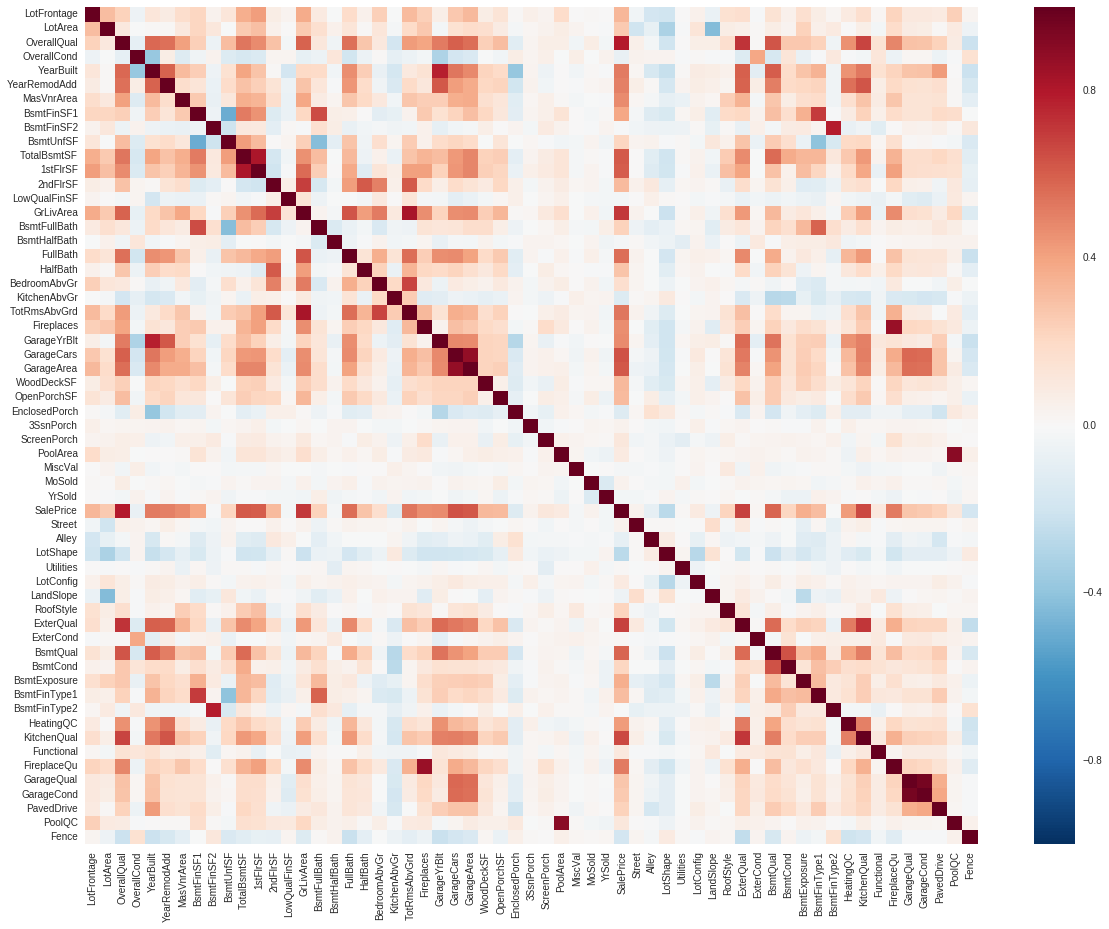

In [819]:
corr = train_num.corr()
fig , ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr)

In [820]:
train_num.drop("SalePrice",axis = 1,inplace=True)

/home/mohan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Remove bad features

In [821]:
for i in badnum:
    train_num.drop(i,1,inplace=True)
    test_num.drop(i,1,inplace=True)
for j in badcat:    
    train_cat.drop(j,1,inplace=True)
    test_cat.drop(j,1,inplace=True)
    
print(train_num.columns)
print(train_cat.columns)

/home/mohan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mohan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mohan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/mohan/.local/lib/python3.5/site-packages/ipyk

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'Street', 'Utilities', 'LotConfig',
       'RoofStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC'],
      dtype='object')
Index(['MSSubClass_112spud', 'MSSubClass_1s46n', 'MSSubClass_1spud',
       'MSSubClass_212s', 'MSSubClass_246n', 'MSZoning_FV', 'MSZoning_RL',
       'LandContour_4', 'LandContour_HLS', 'Neighborhood_Blmngtn',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
      

In [822]:
print(test_num.isnull().sum().sort_values(ascending=False))

PoolQC          0
WoodDeckSF      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtFullBath    0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
LotArea         0
GarageArea      0
OpenPorchSF     0
PavedDrive      0
3SsnPorch       0
GarageCond      0
GarageQual      0
FireplaceQu     0
Functional      0
KitchenQual     0
HeatingQC       0
BsmtFinType1    0
BsmtExposure    0
BsmtCond        0
BsmtQual        0
ExterCond       0
ExterQual       0
RoofStyle       0
LotConfig       0
Utilities       0
Street          0
MoSold          0
PoolArea        0
ScreenPorch     0
LotFrontage     0
dtype: int64


# Normalize num features

normal = [] 
for s in train_num.columns:
    normal.append(s)
normal.remove('YearBuilt')
normal.remove('YearRemodAdd')
normal.remove('GarageYrBlt')
normal.remove('RoofStyle')
normal.remove('BsmtFinType1')
normal.remove('Functional')
normal.remove('PavedDrive')
normal.remove('Utilities')


print (normal)
for i in range(0,len(normal)-1):
    diff = max(train_num[normal[i]])-min(train_num[normal[i]])
    train_num[normal[i]]=train_num[normal[i]]-train_num[normal[i]].mean()
    train_num[normal[i]] =train_num[normal[i]]/diff
for i in range(0,len(normal)-1):
    diff = max(test_num[normal[i]])-min(test_num[normal[i]])
    test_num[normal[i]]=test_num[normal[i]]-test_num[normal[i]].mean()
    test_num[normal[i]] =test_num[normal[i]]/diff

In [823]:
print(test_num.isnull().sum().sort_values(ascending=False))

PoolQC          0
WoodDeckSF      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtFullBath    0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
LotArea         0
GarageArea      0
OpenPorchSF     0
PavedDrive      0
3SsnPorch       0
GarageCond      0
GarageQual      0
FireplaceQu     0
Functional      0
KitchenQual     0
HeatingQC       0
BsmtFinType1    0
BsmtExposure    0
BsmtCond        0
BsmtQual        0
ExterCond       0
ExterQual       0
RoofStyle       0
LotConfig       0
Utilities       0
Street          0
MoSold          0
PoolArea        0
ScreenPorch     0
LotFrontage     0
dtype: int64


# Identify Good features

In [824]:
goodnum=[]
for s in train_num.columns:
    fe = pd.DataFrame(train_num[s])
    data =pd.concat([fe,y_train],axis = 1)
    co = data.corr()
    if co.iloc[0,1]>0.5:
        goodnum.append(s)
print(goodnum)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'ExterQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu']


In [825]:
goodnum.remove('YearBuilt')
goodnum.remove('YearRemodAdd')

Create squared and cubic features

In [826]:
for good in goodnum:
    train_num[str(good)+'sqr'] = train_num[good]**2
    test_num[str(good)+'sqr'] = test_num[good]**2
 #   train_num[str(good)+'sqr'] = train_num[good]**3
 #   test_num[str(good)+'sqr'] = test_num[good]**3

/home/mohan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mohan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [827]:
print(train_cat.shape)
print(train_num.shape)
print(test_cat.shape)
print(test_num.shape)

(1460, 68)
(1460, 57)
(1459, 68)
(1459, 57)


In [828]:
print(train_num.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'Street', 'Utilities', 'LotConfig',
       'RoofStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'OverallQualsqr', 'TotalBsmtSFsqr', '1stFlrSFsqr',
       'GrLivAreasqr', 'FullBathsqr', 'TotRmsAbvGrdsqr', 'GarageCarssqr',
       'GarageAreasqr', 'ExterQualsqr', 'BsmtQualsqr', 'KitchenQualsqr',
       'FireplaceQusqr'],
      dtype='object')


# Standardize the data

stdSc = StandardScaler()

train_num = stdSc.fit_transform(train_num)
test_num = stdSc.fit_transform(test_num)
#train_cat = stdSc.fit_transform(train_cat)

In [829]:
print(train_cat.isnull().any().any())
print(train_num.isnull().any().any())
print(test_cat.isnull().any().any())
print(test_num.isnull().any().any())
#print(test_num.isnull().sum().sort_values(ascending=False))

False
False
False
False


# Create train and test feature sets

In [830]:
#As the "SalePrice" is right skewed we transform it to log values and also we can 
#avoid the negative value prediction for "SalePrice"
y_train = np.log(y_train)
#sns.distplot(int(y_train))
# We will revert back this after predict using exp function
#to get real SalePrice

x_train = pd.concat([train_num,train_cat],axis = 1)
x_test = pd.concat([test_num,test_cat],axis =1)

#x_train.info()
#x_train = train_num
#x_test = test_num

print("size of train data set:-{}".format(x_train.shape))
print("size of test data set:-{}".format(x_test.shape))


print("size of train numerical features:-{}".format(train_num.shape))
print("size of train categorical features:-{}".format(train_cat.shape))

print("size of test numerical features:-{}".format(test_num.shape))
print("size of test categorical features:-{}".format(test_cat.shape))


print("Are there any null values in train set - {}".format(x_train.isnull().sum().any().any()))
print("Are there any null values in test set - {}".format(x_test.isnull().sum().any().any()))

size of train data set:-(1460, 125)
size of test data set:-(1459, 125)
size of train numerical features:-(1460, 57)
size of train categorical features:-(1460, 68)
size of test numerical features:-(1459, 57)
size of test categorical features:-(1459, 68)
Are there any null values in train set - False
Are there any null values in test set - False


# Create RMSE function to select best alpha

In [831]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=5))
    return rmse

# Train classifier

In [832]:
#clf = LinearRegression(normalize = True) 
#clf = Ridge(alpha = 10,normalize= True)
#clf = RandomForestClassifier()
clf = LassoCV(alphas = [0.0005],max_iter=10000)
clf.fit(x_train,y_train)

LassoCV(alphas=[0.0005], copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

# Using Ridge model

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel('alphas')
plt.ylabel('rmse')

# Using lassoCV

alp = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_lasso = [rmse_cv(LassoCV(alphas = alpha)).mean() for alpha in alp]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation")
plt.xlabel('alphas')
plt.ylabel('rmse')

# Using XGBoost

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

# Predict ,Score and make submission file

In [833]:
y_test = clf.predict(x_test)
#Sp = pd.DataFrame(y_test)
#Sp = math.exp(Sp)

In [834]:
print(clf.score(x_train,y_train)*100)


91.5800020025


In [835]:
submission = pd.DataFrame({'Id':test_Id,'SalePrice':y_test})
submission['SalePrice']= np.exp(submission['SalePrice'])

In [836]:
submission.to_csv('submission.csv',index = False)

In [837]:
print(submission.describe())

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  177673.687480
std     421.321334   75381.353780
min    1461.000000   52192.677808
25%    1825.500000  125273.542459
50%    2190.000000  157075.858083
75%    2554.500000  210738.580529
max    2919.000000  532894.721582


In [838]:
preds=pd.DataFrame({'predictions':clf.predict(x_train),'true':y_train})
preds['residuals'] = preds['predictions']-preds['true']

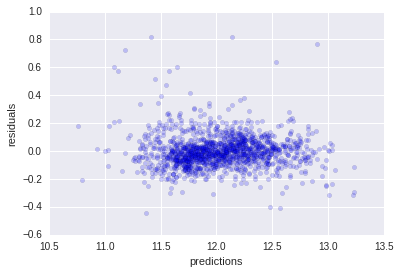

In [839]:
fig,ax = plt.subplots()
ax.scatter(preds['predictions'],preds['residuals'],alpha=0.2)
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.show()

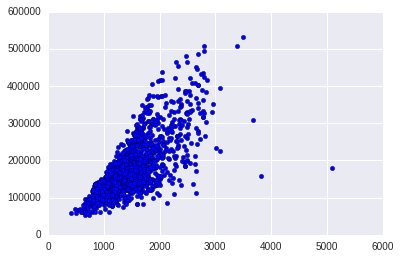

In [840]:
fig,ax = plt.subplots()
ax.scatter(test_num['GrLivArea'],submission['SalePrice'])
plt.show()